In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree 

# Data preprocessing

In [2]:
tc = pd.read_csv("./updated_tc_Regression.csv")
tc.info()
tc.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kind           4841 non-null   object 
 1   area           4841 non-null   object 
 2   space          4841 non-null   float64
 3   floor          4841 non-null   int64  
 4   cat_floor      4841 non-null   object 
 5   top_floor      4841 non-null   int64  
 6   cat_top_floor  4841 non-null   object 
 7   mrt            4841 non-null   int64  
 8   bd             4841 non-null   int64  
 9   pet            4841 non-null   int64  
 10  elevator       4841 non-null   int64  
 11  parking        4841 non-null   int64  
 12  balcony        4841 non-null   int64  
 13  price          4841 non-null   int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 529.6+ KB


kind area  space  floor cat_floor  top_floor cat_top_floor  mrt  bd  pet  \
0  整層住家  北屯區   28.0      2     1~5 樓         15       11~15 樓    0   1    0   
1  獨立套房  北屯區   12.6      6    6~10 樓          7        6~10 樓    0   1    0   
2  獨立套房  北屯區   13.0      6    6~10 樓          7        6~10 樓    0   1    0   
3  獨立套房  北屯區   13.0      2     1~5 樓          7        6~10 樓    0   1    0   
4  獨立套房   北區   13.0     12   11~15 樓         12       11~15 樓    0   0    0   

   elevator  parking  balcony  price  
0         1        0        0  29000  
1         1        0        0   8699  
2         1        0        0  11000  
3         1        0        0  11000  
4         1        0        0  11000

In [3]:
tc.dtypes

kind              object
area              object
space            float64
floor              int64
cat_floor         object
top_floor          int64
cat_top_floor     object
mrt                int64
bd                 int64
pet                int64
elevator           int64
parking            int64
balcony            int64
price              int64
dtype: object

## Frequency encoding

In [4]:
tc.area

0       北屯區
1       北屯區
2       北屯區
3       北屯區
4        北區
       ... 
4836     北區
4837    北屯區
4838     西區
4839     北區
4840    西屯區
Name: area, Length: 4841, dtype: object

In [5]:
area_freq = tc.area.value_counts(normalize = True).to_dict()
area_freq

{'西屯區': 0.2171039041520347,
 '北屯區': 0.1658748192522206,
 '北區': 0.15595951249741788,
 '西區': 0.0712662673001446,
 '南屯區': 0.06630861392274323,
 '南區': 0.05618673827721545,
 '東區': 0.03945465812848585,
 '太平區': 0.03656269365833505,
 '烏日區': 0.02995248915513324,
 '龍井區': 0.028713075810782897,
 '大里區': 0.027473662466432555,
 '豐原區': 0.019004337946705228,
 '沙鹿區': 0.017971493493079943,
 '中區': 0.01693864903945466,
 '大雅區': 0.015286097913654203,
 '潭子區': 0.011567857880603181,
 '清水區': 0.009915306754802726,
 '霧峰區': 0.007229911175376988,
 '后里區': 0.007229911175376988}

In [6]:
tc['area_freq'] = tc.area.map(area_freq)
tc.head(8)

kind area  space  floor cat_floor  top_floor cat_top_floor  mrt  bd  pet  \
0  整層住家  北屯區   28.0      2     1~5 樓         15       11~15 樓    0   1    0   
1  獨立套房  北屯區   12.6      6    6~10 樓          7        6~10 樓    0   1    0   
2  獨立套房  北屯區   13.0      6    6~10 樓          7        6~10 樓    0   1    0   
3  獨立套房  北屯區   13.0      2     1~5 樓          7        6~10 樓    0   1    0   
4  獨立套房   北區   13.0     12   11~15 樓         12       11~15 樓    0   0    0   
5  獨立套房  西屯區    7.3      6    6~10 樓          6        6~10 樓    1   0    0   
6  獨立套房  西屯區   13.3      3     1~5 樓          5         1~5 樓    0   1    0   
7  獨立套房  霧峰區   18.7      3     1~5 樓          5         1~5 樓    0   1    0   

   elevator  parking  balcony  price  area_freq  
0         1        0        0  29000   0.165875  
1         1        0        0   8699   0.165875  
2         1        0        0  11000   0.165875  
3         1        0        0  11000   0.165875  
4         1        0        0  11000   0.155960  
5         1        0        0   7300   0.217104  
6         1        0        0   8999   0.217104  
7         1        0        0   8998   0.007230

## One-hot encoding

In [7]:
on_hot_encode_kind = pd.get_dummies(tc['kind'], prefix='kind')
on_hot_encode_kind

kind_分租套房  kind_整層住家  kind_獨立套房
0             0          1          0
1             0          0          1
2             0          0          1
3             0          0          1
4             0          0          1
...         ...        ...        ...
4836          0          0          1
4837          0          1          0
4838          0          0          1
4839          0          0          1
4840          0          0          1

[4841 rows x 3 columns]

In [8]:
tc = pd.concat([tc, on_hot_encode_kind], axis = 1)

tc_reset_colums= ['kind'
               , 'kind_分租套房'
               , 'kind_整層住家'
               , 'kind_獨立套房' 
               , 'area'
               , 'area_freq'
               , 'space'
               , 'floor'
               ,'cat_floor'
               , 'top_floor'
               , 'cat_top_floor'
               , 'mrt'
               , 'bd'
               , 'pet'
               , 'elevator'
               , 'parking'
               , 'balcony'
               , 'price'
               ]

tc = tc[tc_reset_colums]
tc.rename(columns={'kind_分租套房': 'kind_sublet'
                   , 'kind_整層住家': 'kind_whole_floor'
                   , 'kind_獨立套房':'kind_independent'}
          , inplace=True)

## Create X and y

In [9]:
tc.iloc[[1744],:]

kind  kind_sublet  kind_whole_floor  kind_independent area  area_freq  \
1744  整層住家            0                 1                 0  北屯區   0.165875   

      space  floor cat_floor  top_floor cat_top_floor  mrt  bd  pet  elevator  \
1744   28.0     12   11~15 樓         14       11~15 樓    0   1    0         1   

      parking  balcony  price  
1744        0        0  22999

In [10]:
X = tc.drop(['cat_floor','cat_top_floor', 'price', 'kind', 'area', 'top_floor'], axis = 1)
y = tc['price']
X.columns

Index(['kind_sublet', 'kind_whole_floor', 'kind_independent', 'area_freq',
       'space', 'floor', 'mrt', 'bd', 'pet', 'elevator', 'parking', 'balcony'],
      dtype='object')

# Decision Tree Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Bulid decision tree (split with MSE)

In [13]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'squared_error'
                           ).fit(X_train, y_train)

real_y_test = y_test.to_numpy()
pred_y_test = dtr.predict(X_test)

# print(real_y_test)
# print(pred_y_test)

print('training R squared :', dtr.score(X_test, y_test))
print('testing R squared :', dtr.score(X_train, y_train))


training R squared : 0.6658057439807048
testing R squared : 0.9141571860358944


In [14]:
importance = list(zip(dtr.feature_importances_, X.columns))
sorted(importance)

[(0.00013473719515322069, 'kind_sublet'),
 (0.0002573621104879609, 'kind_independent'),
 (0.000844926717956021, 'balcony'),
 (0.006506387794949951, 'pet'),
 (0.007603271254435929, 'bd'),
 (0.010295930528897976, 'parking'),
 (0.013833857722196584, 'elevator'),
 (0.014211588577109312, 'mrt'),
 (0.064081740011026, 'floor'),
 (0.07670423876319077, 'area_freq'),
 (0.3756641982119519, 'space'),
 (0.4298617611126443, 'kind_whole_floor')]

In [15]:
# text_representation = tree.export_text(dtr, feature_names = X.columns.tolist())
# print(text_representation)

## Decision tree pruning with CCP (split with MSE)

In [16]:
from sklearn.model_selection import cross_val_score
import time 

In [17]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'squared_error'
                           ).fit(X_train, y_train)


model_prune = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = model_prune['ccp_alphas']
impurities = model_prune['impurities']

pd.DataFrame(model_prune).T

0             1             2             3     \
ccp_alphas  0.000000e+00  0.000000e+00  0.000000e+00  3.865352e-12   
impurities  1.641337e+07  1.641337e+07  1.641337e+07  1.641337e+07   

                    4             5             6             7     \
ccp_alphas  1.455192e-11  1.546141e-11  1.291326e-05  4.304397e-05   
impurities  1.641337e+07  1.641337e+07  1.641337e+07  1.641337e+07   

                    8             9     ...          2278          2279  \
ccp_alphas  4.304401e-05  4.304407e-05  ...  1.058121e+06  1.128905e+06   
impurities  1.641337e+07  1.641337e+07  ...  4.883234e+07  5.109015e+07   

                    2280          2281          2282          2283  \
ccp_alphas  1.263963e+06  1.946330e+06  2.606383e+06  4.506460e+06   
impurities  5.235411e+07  5.430044e+07  5.690682e+07  6.141328e+07   

                    2284          2285          2286          2287  
ccp_alphas  4.631589e+06  8.225819e+06  4.179670e+07  7.513520e+07  
impurities  6.604487e+07  7.427069e+07  1.160674e+08  1.912026e+08  

[2 rows x 2288 columns]

In [18]:
len(ccp_alphas)

2288

### CV to choose best ccp_alpha (evaluate with R squared)

In [19]:
ccp_train_r2s = []
ccp_test_r2s = []
start = time.time()

for i in ccp_alphas:
    
    dtr_prune = DecisionTreeRegressor(criterion='squared_error'
                                      , ccp_alpha= i)
    
    ccp_test_r2 = cross_val_score(dtr_prune, X, y, cv=5, scoring="r2", n_jobs = 4).mean()
    
    dtr_prune.fit(X_train,y_train)
    ccp_train_r2 = dtr_prune.score(X_train,y_train)
    
    ccp_train_r2s.append(ccp_train_r2)
    ccp_test_r2s.append(ccp_test_r2)

end = time.time()
print('The calculation cost: ',end - start, 'sec')

The calculation cost:  129.02926802635193 sec


In [20]:
sorted(ccp_test_r2s, reverse = True)[0:10]

[0.6905056190876457,
 0.6897285332599814,
 0.6847330340316574,
 0.671569792775968,
 0.671569792775968,
 0.6570483968365954,
 0.6565651580191532,
 0.656381489876657,
 0.6562042640897688,
 0.6544993273495575]

In [21]:
# aplha = [, ) is the best
top_3_r2 = sorted([* zip(ccp_alphas, ccp_test_r2s, ccp_train_r2s)], key=lambda a: a[1], reverse = True)[0:3]
top_3_r2

[(1263962.6280006208, 0.6905056190876457, 0.7261851493602425),
 (1946330.0617188038, 0.6897285332599814, 0.7160057367534137),
 (2606383.347107075, 0.6847330340316574, 0.7023742093862929)]

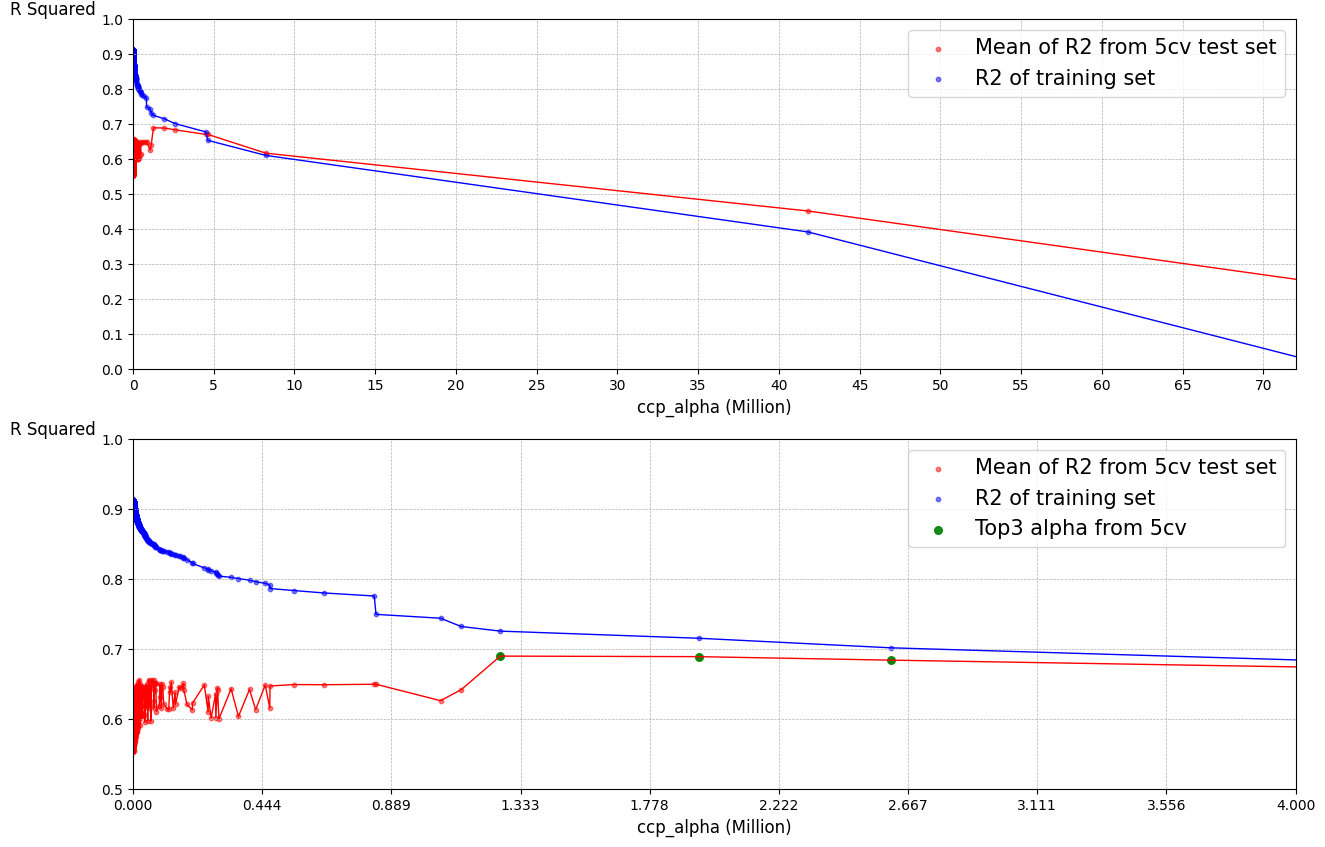

In [22]:
fig = plt.figure(figsize=(15,10))

sub1 = fig.add_subplot(211)
sub1.scatter(ccp_alphas/1000000, ccp_test_r2s, color = 'red', s = 10, alpha = 0.5)  
sub1.scatter(ccp_alphas/1000000, ccp_train_r2s, color = 'blue', s = 10, alpha = 0.5)  
sub1.plot(ccp_alphas/1000000, ccp_test_r2s, color='red', linewidth=1)
sub1.plot(ccp_alphas/1000000, ccp_train_r2s, color='blue', linewidth=1)
sub1.grid(linestyle='--', linewidth=0.5)
sub1.set_xlabel("ccp_alpha (Million)",fontsize=12,rotation=0)
sub1.set_ylabel("R Squared",fontsize=12, rotation=0, loc = 'top')
sub1.set_ylim([0,1])
sub1.set_xlim([0, 72])
sub1.set_xticks(np.linspace(0,70,15))
sub1.set_yticks(np.linspace(0,1,11))
sub1.legend(['Mean of R2 from 5cv test set', 'R2 of training set'], fontsize = 15)


sub2 = fig.add_subplot(212)
sub2.scatter(ccp_alphas/1000000, ccp_test_r2s, color = 'red', s = 10, alpha = 0.5)  
sub2.scatter(ccp_alphas/1000000, ccp_train_r2s, color = 'blue', s = 10, alpha = 0.5)  
for i in top_3_r2:
    sub2.scatter(i[0]/1000000, i[1], color = 'green', s = 30, alpha = 0.9) 
sub2.plot(ccp_alphas/1000000, ccp_test_r2s, color='red', linewidth=1)
sub2.plot(ccp_alphas/1000000, ccp_train_r2s, color='blue', linewidth=1)
sub2.grid(linestyle='--', linewidth=0.5)
sub2.set_xlabel("ccp_alpha (Million)",fontsize=12,rotation=0)
sub2.set_ylabel("R Squared",fontsize=12, rotation=0, loc = 'top')
sub2.set_ylim([0.5,1])
sub2.set_xlim([0, 4])
sub2.set_xticks(np.linspace(0,4,10))
sub2.set_yticks(np.linspace(0.5,1,6))
sub2.legend(['Mean of R2 from 5cv test set', 'R2 of training set', 'Top3 alpha from 5cv'], fontsize = 15)

plt.show()

### Visualize pruned tree on test set

In [23]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'squared_error'
                            , min_samples_leaf = 5
                            , ccp_alpha = top_3_r2[0][0]).fit(X_train, y_train)

pred_y_train = dtr.predict(X_train)
pred_y_test = dtr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print('training set MAE :',mean_absolute_error(y_true = y_train, y_pred = pred_y_train))
print('test set MAE :', mean_absolute_error(y_true = y_test, y_pred = pred_y_test))
print('training R squared :', dtr.score(X_train, y_train))
print('test R squared :', dtr.score(X_test, y_test))

training set MAE : 3541.1085988204945
test set MAE : 3904.503231491259
training R squared : 0.7092267108225283
test R squared : 0.7184548477363382


In [24]:
np.unique(pred_y_test)

array([  7733.96842105,  10819.16602317,  21231.93162393,  27314.22817955,
        36173.1       ,  56083.16666667,  69166.44444444, 121250.        ])

In [25]:
np.unique(pred_y_train)

array([  7733.96842105,  10819.16602317,  21231.93162393,  27314.22817955,
        36173.1       ,  56083.16666667,  69166.44444444, 121250.        ])

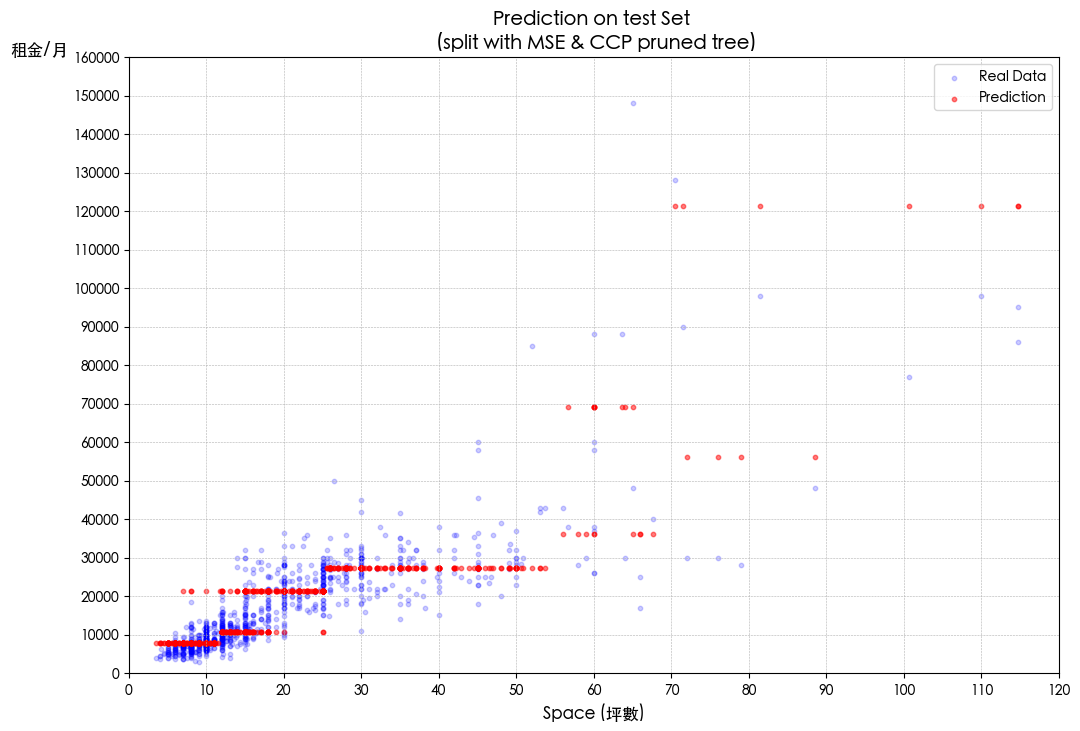

In [26]:
# test set (space and price)

plt.rcParams['font.family'] = ['Heiti TC']

fig2 = plt.figure(figsize=(12,8))

ax = fig2.add_subplot(111)
ax.scatter(X_test['space'], y_test, color = 'blue', s = 10, alpha = 0.2)  
ax.scatter(X_test['space'], pred_y_test, color = 'red', s = 10, alpha = 0.5)  

ax.set_ylim([0,160000])
ax.set_xlim([0, 120])
ax.set_yticks(np.linspace(0,160000,17))
ax.set_xticks(np.linspace(0,120,13))
ax.grid(linestyle='--', linewidth=0.4)

ax.set_xlabel("Space (坪數)",fontsize=12,rotation=0)
ax.set_ylabel("租金/月",fontsize=12, rotation=0, loc = 'top')
ax.set_title('Prediction on test Set \n (split with MSE & CCP pruned tree)', fontsize=14)
ax.legend(['Real Data','Prediction'], fontsize = 10)

plt.show()

In [27]:
text_representation = tree.export_text(dtr, feature_names = X.columns.tolist())
print(text_representation)

|--- kind_whole_floor <= 0.50
|   |--- space <= 11.95
|   |   |--- value: [7733.97]
|   |--- space >  11.95
|   |   |--- value: [10819.17]
|--- kind_whole_floor >  0.50
|   |--- space <= 70.15
|   |   |--- space <= 25.05
|   |   |   |--- value: [21231.93]
|   |   |--- space >  25.05
|   |   |   |--- space <= 55.30
|   |   |   |   |--- value: [27314.23]
|   |   |   |--- space >  55.30
|   |   |   |   |--- floor <= 11.50
|   |   |   |   |   |--- value: [36173.10]
|   |   |   |   |--- floor >  11.50
|   |   |   |   |   |--- value: [69166.44]
|   |--- space >  70.15
|   |   |--- area_freq <= 0.19
|   |   |   |--- value: [56083.17]
|   |   |--- area_freq >  0.19
|   |   |   |--- value: [121250.00]



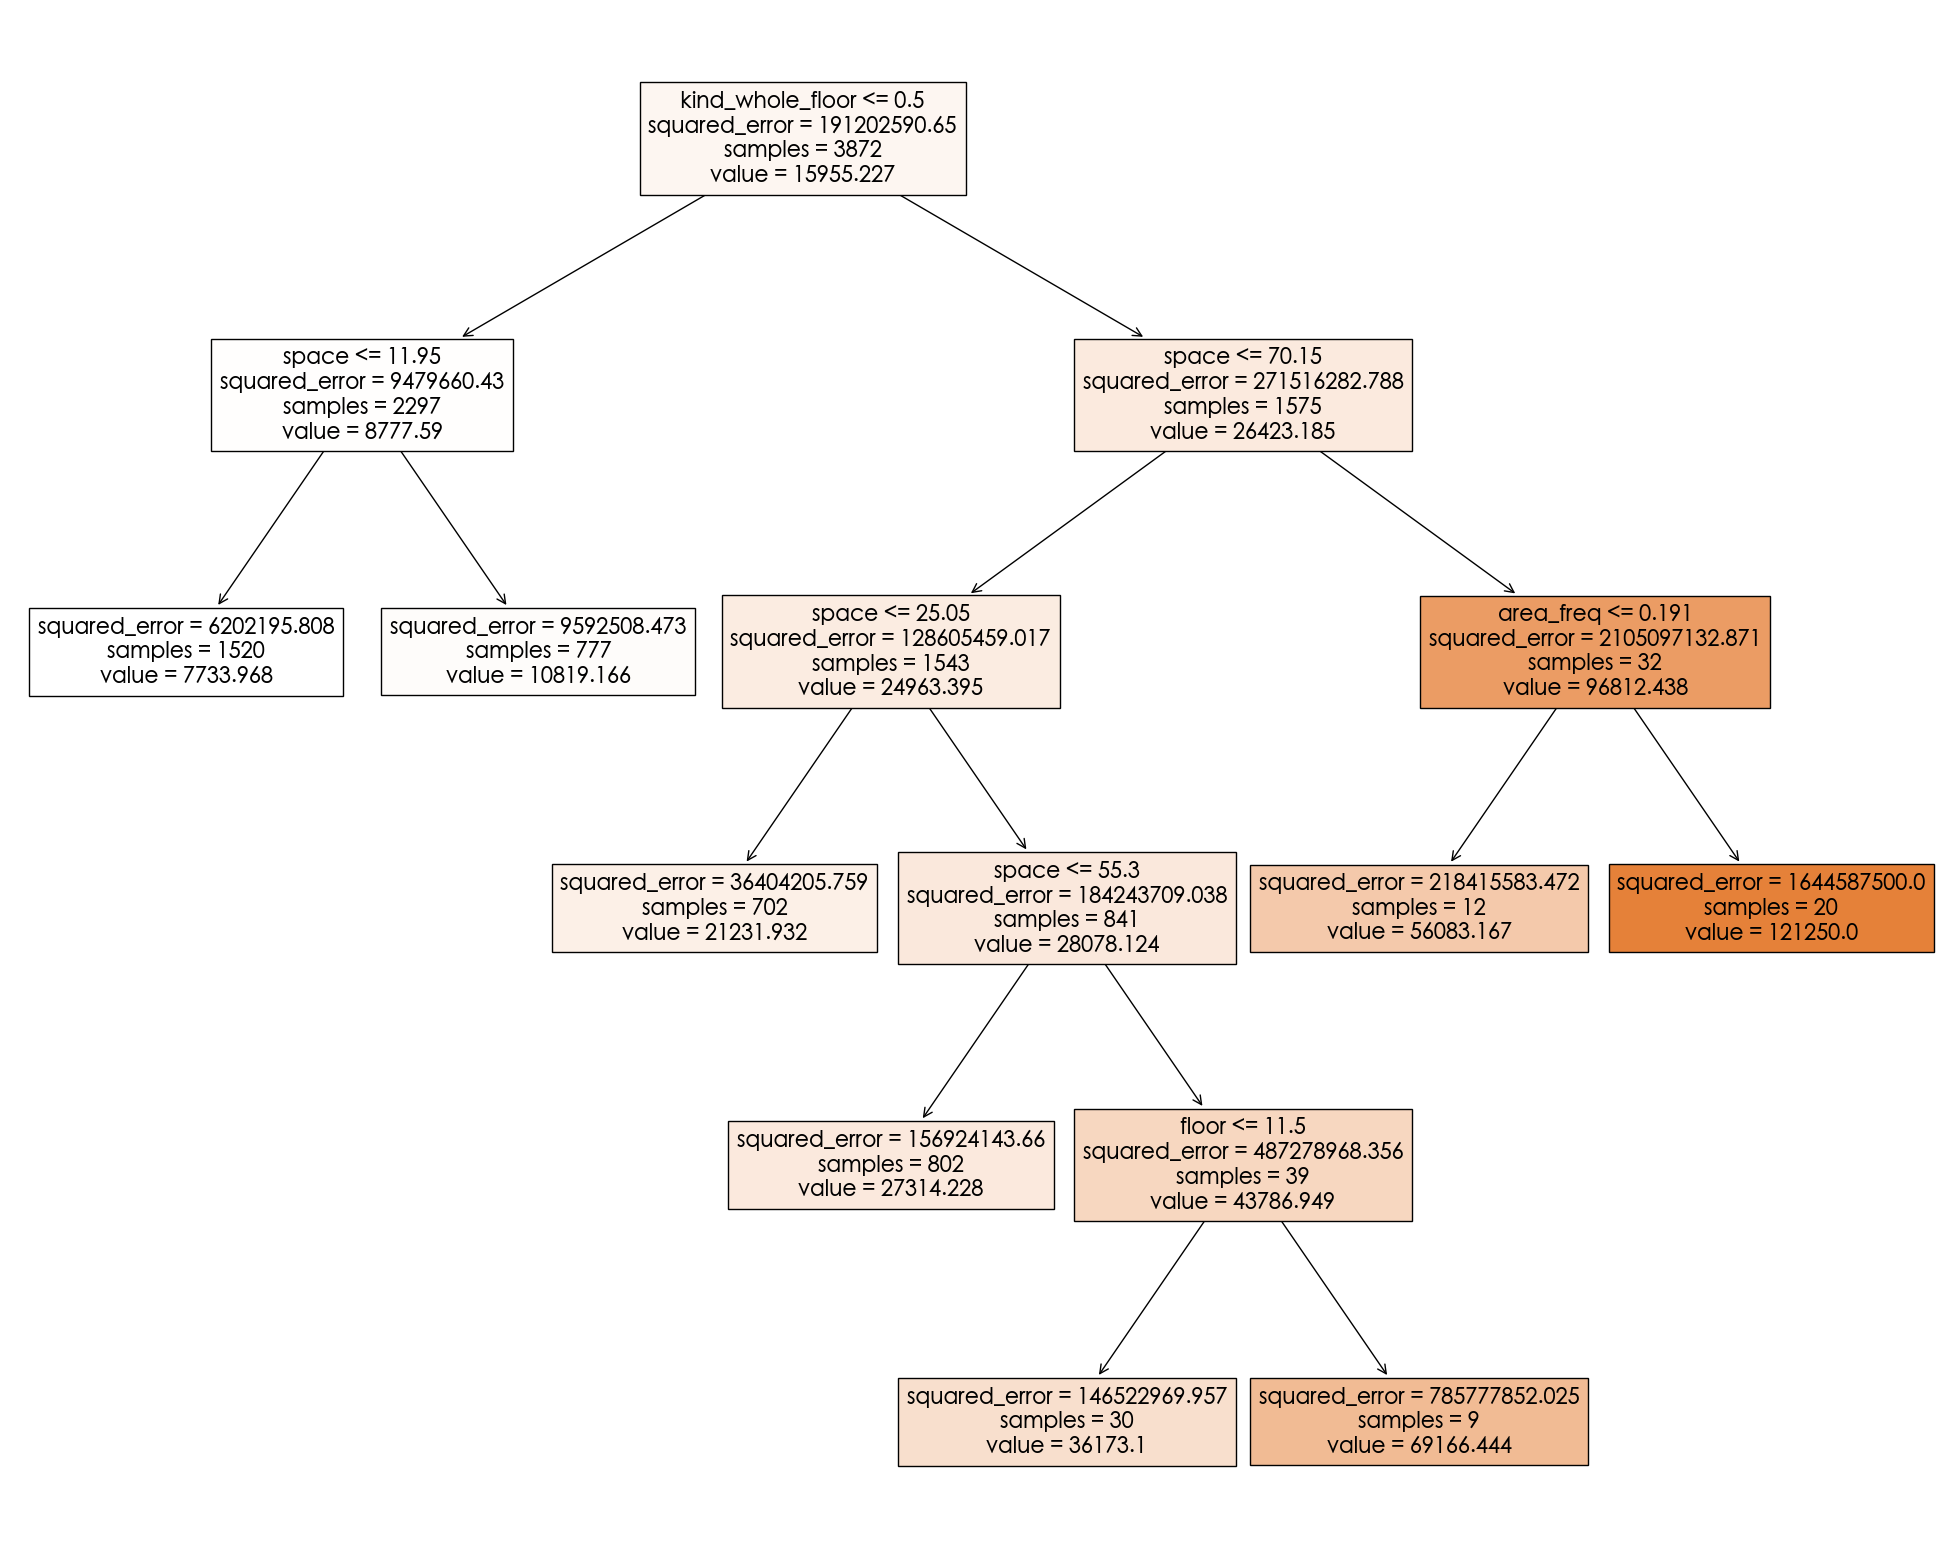

In [28]:
fig3 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=X.columns, 
                   filled=True)

## Bulid decision tree (split with MAE)


### GridSearch CV to bulid tree

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
dtr = DecisionTreeRegressor(random_state = 100, criterion = 'absolute_error')
para = {"max_depth":[*range(2,16)]
        ,'splitter' :['random', 'best']
        , 'min_samples_split':[*range(10,210,50)]
        ,'min_samples_leaf':[*range(5,105,25)]
        }
GS = GridSearchCV(dtr, para, cv=5, scoring = 'r2', n_jobs = 4)

In [31]:
start = time.time()
GS.fit(X,y)
end = time.time()
print('The calculation cost: ',end - start, 'sec')

The calculation cost:  151.0032980442047 sec


In [32]:
GS.best_params_

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'best'}

In [33]:
GS.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=5, min_samples_split=10,
                      random_state=100)

### Visualize best model from GridSearch CV on test set

In [34]:
dtr = GS.best_estimator_.fit(X_train, y_train)

In [35]:
pred_y_train = dtr.predict(X_train)
pred_y_test = dtr.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
print('training set MAE :',mean_absolute_error(y_true = y_train, y_pred = pred_y_train))
print('test set MAE :', mean_absolute_error(y_true = y_test, y_pred = pred_y_test))

print('training R squared :', dtr.score(X_train, y_train))
print('test R squared :', dtr.score(X_test, y_test))

training set MAE : 2584.8535640495866
test set MAE : 3438.018575851393
training R squared : 0.7577799465767896
test R squared : 0.7375236486004655


In [37]:
np.unique(pred_y_train)

array([  4200. ,   4999. ,   5000. ,   5300. ,   5399.5,   5500. ,
         5749. ,   5799. ,   5900. ,   5999. ,   6000. ,   6200. ,
         6250. ,   6300. ,   6499. ,   6499.5,   6549. ,   6800. ,
         6900. ,   6999. ,   7000. ,   7100. ,   7249. ,   7299. ,
         7450. ,   7499. ,   7500. ,   7999. ,   7999.5,   8000. ,
         8249. ,   8499. ,   8500. ,   8599. ,   8600. ,   8699. ,
         8749.5,   8999. ,   8999.5,   9000. ,   9249.5,   9499.5,
         9500. ,   9600. ,   9650. ,   9749. ,   9999. ,  10000. ,
        10193.5,  10249.5,  10250. ,  10499.5,  10500. ,  10700. ,
        10999. ,  11000. ,  11499. ,  11499.5,  11500. ,  11999. ,
        11999.5,  12000. ,  12180. ,  12250. ,  12499. ,  12500. ,
        12874.5,  12999. ,  13000. ,  13499. ,  14000. ,  14100. ,
        14500. ,  14800. ,  15000. ,  15499. ,  15999. ,  16000. ,
        16250. ,  16499. ,  16999. ,  17000. ,  17250. ,  17499. ,
        17899.5,  17999. ,  18000. ,  18500. ,  18999. ,  1900

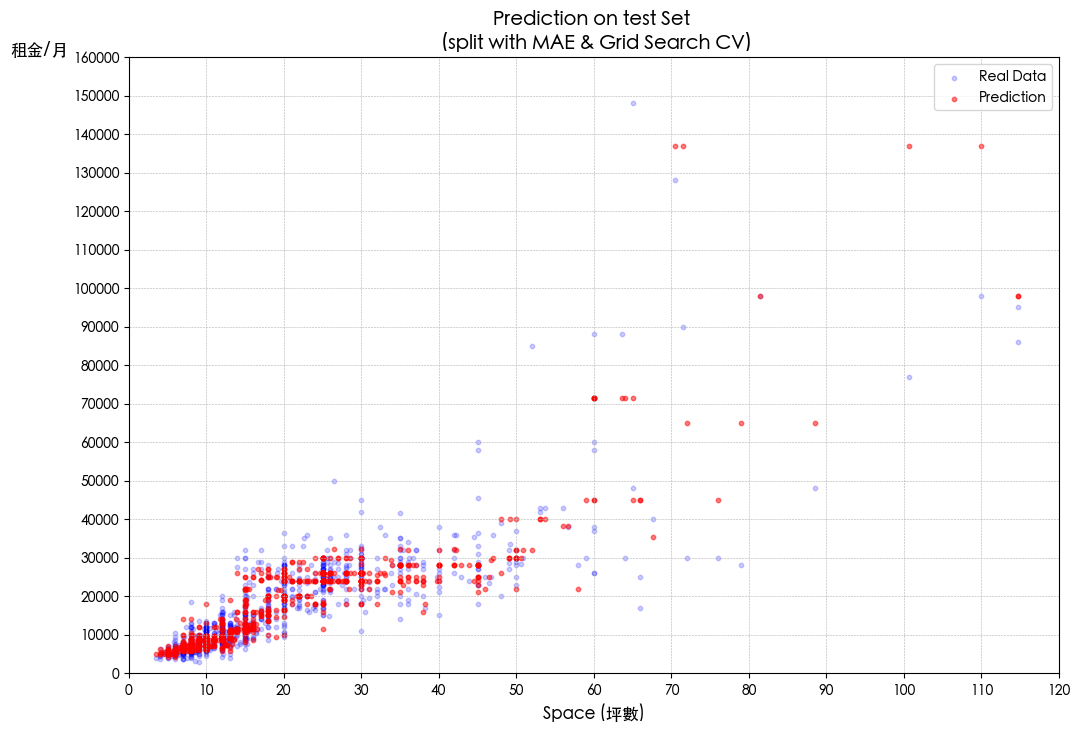

In [38]:
# test set (space and price)

plt.rcParams['font.family'] = ['Heiti TC']

fig2 = plt.figure(figsize=(12,8))

ax = fig2.add_subplot(111)
ax.scatter(X_test['space'], y_test, color = 'blue', s = 10, alpha = 0.2)  
ax.scatter(X_test['space'], pred_y_test, color = 'red', s = 10, alpha = 0.5)  
ax.set_ylim([0,160000])
ax.set_xlim([0, 120])
ax.set_yticks(np.linspace(0,160000,17))
ax.set_xticks(np.linspace(0,120,13))
ax.grid(linestyle='--', linewidth=0.4)

ax.set_xlabel("Space (坪數)",fontsize=12,rotation=0)
ax.set_ylabel("租金/月",fontsize=12, rotation=0, loc = 'top')
ax.set_title('Prediction on test Set \n (split with MAE & Grid Search CV)', fontsize=14)
ax.legend(['Real Data','Prediction'], fontsize = 10)

plt.show()

In [39]:
# text_representation = tree.export_text(GS.best_estimator_, feature_names = X.columns.tolist())
# print(text_representation)

In [40]:
import graphviz
from sklearn import tree

In [41]:
dot_data = tree.export_graphviz(GS.best_estimator_
                                ,feature_names= X_train.columns
                                ,filled=True
                                ,rounded=True
                                ,rotate = True
                                # , leaves_parallel = True
                                )


graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('tree_mae_GridCV',view=True)


'tree_mae_GridCV.png'

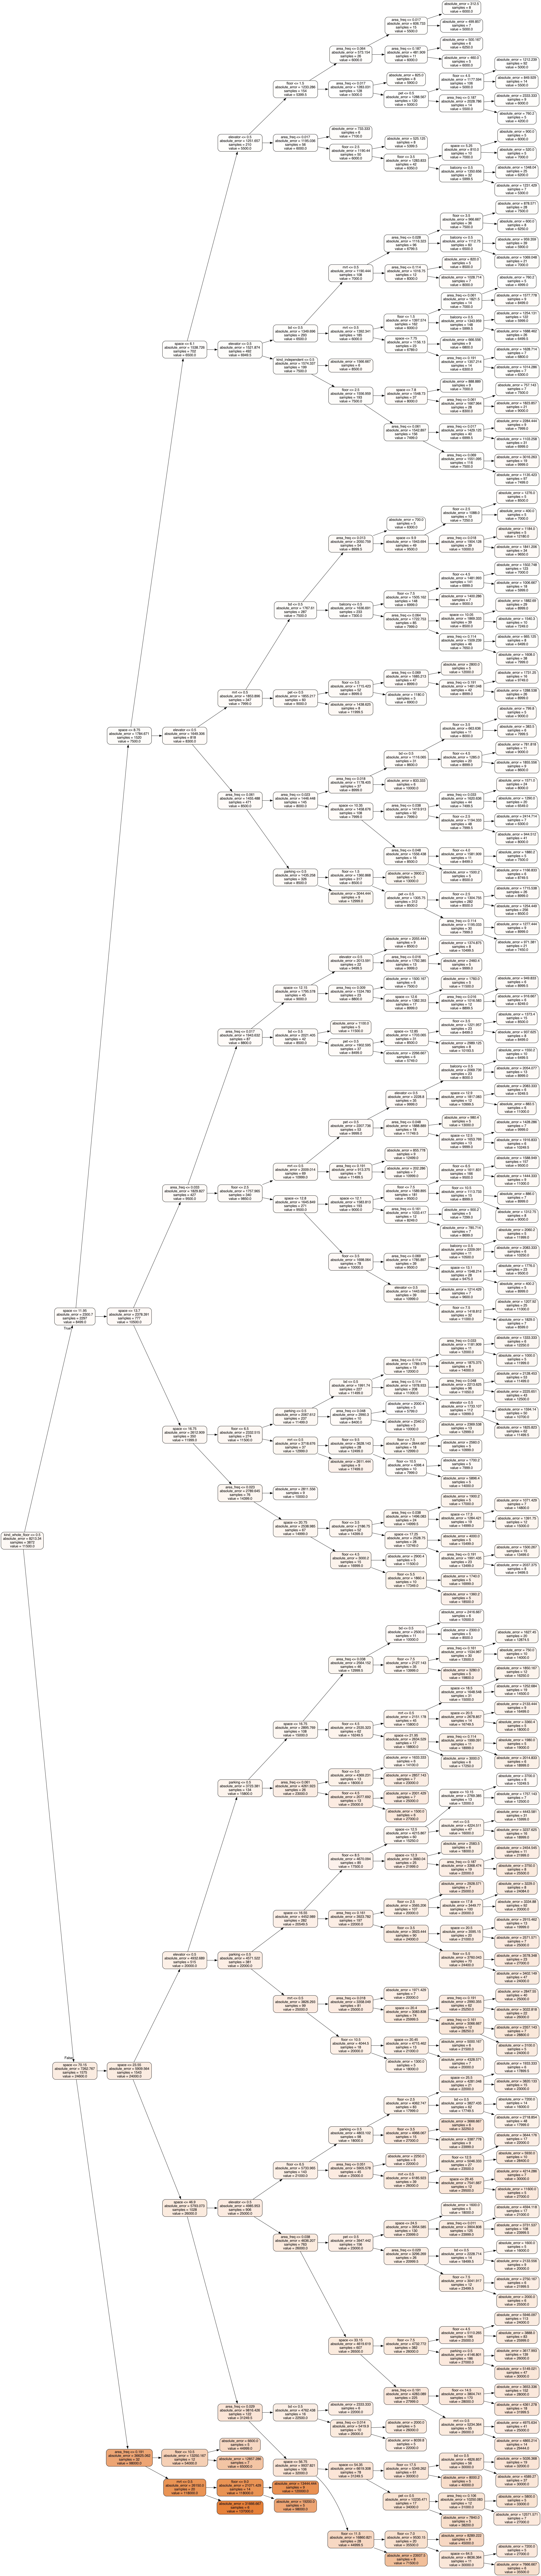

In [42]:
from IPython.display import Image
Image(filename=('./tree_mae_GridCV.png'),width=1500)



### Decision tree pruning with CCP (split with MAE)

In [43]:
from sklearn.model_selection import cross_val_score
import time 

In [44]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'absolute_error'
                           ).fit(X_train, y_train)


model_prune = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = model_prune['ccp_alphas']
impurities = model_prune['impurities']

pd.DataFrame(model_prune).T

0             1             2             3             4     \
ccp_alphas    0.00000 -4.440892e-16 -4.440892e-16 -4.440892e-16 -2.220446e-16   
impurities  383.01188  3.830119e+02  3.830119e+02  3.830119e+02  3.830119e+02   

                    5             6             7          8          9     \
ccp_alphas -1.110223e-16 -1.110223e-16 -1.110223e-16    0.00000    0.00000   
impurities  3.830119e+02  3.830119e+02  3.830119e+02  383.01188  383.01188   

            ...         1802         1803         1804         1805  \
ccp_alphas  ...    39.296488    41.293905    62.087293    73.187500   
impurities  ...  3294.163223  3335.457128  3397.544421  3470.731921   

                   1806         1807         1808         1809         1810  \
ccp_alphas    77.389463   126.549587   160.858471   186.982696   296.590393   
impurities  3548.121384  3674.670971  3835.529442  4022.512138  4319.102531   

                   1811  
ccp_alphas  3894.237345  
impurities  8213.339876  

[2 rows x 1812 columns]

In [45]:
ccp_alphas = ccp_alphas[ccp_alphas>=0]

In [46]:
len(ccp_alphas)

1805

In [47]:
np.unique(ccp_alphas).shape

(851,)

In [48]:
ccp_alphas = np.unique(ccp_alphas)

### CV to choose best ccp_alpha (evaluate with negative MAE)

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
ccp_train_maes = []
ccp_test_maes = []
start = time.time()

for i in ccp_alphas:
    
    dtr_prune = DecisionTreeRegressor(criterion='absolute_error'
                                      , ccp_alpha= i)
    
    ccp_test_mae = cross_val_score(dtr_prune, X, y, cv=5, scoring="neg_mean_absolute_error", n_jobs = 4).mean()
    ccp_test_mae = abs(ccp_test_mae)
    
    dtr_prune.fit(X_train,y_train)
    pred_y_train = dtr_prune.predict(X_train)
    
    ccp_train_mae = mean_absolute_error(y_train, pred_y_train)
    
    ccp_train_maes.append(ccp_train_mae)
    ccp_test_maes.append(ccp_test_mae)

end = time.time()
print('The calculation cost: ',end - start, 'sec')

The calculation cost:  959.1207778453827 sec


In [51]:
top_3_maes = sorted([* zip(ccp_alphas, ccp_test_maes, ccp_train_maes)], key=lambda a: a[1], reverse = False)[0:3]
top_3_maes

[(7.489411157024762, 3176.714953752271, 2742.1126033057853),
 (5.808367768595019, 3190.2649776330713, 2673.6720041322315),
 (7.748450413223143, 3193.651480822864, 2810.5521694214876)]

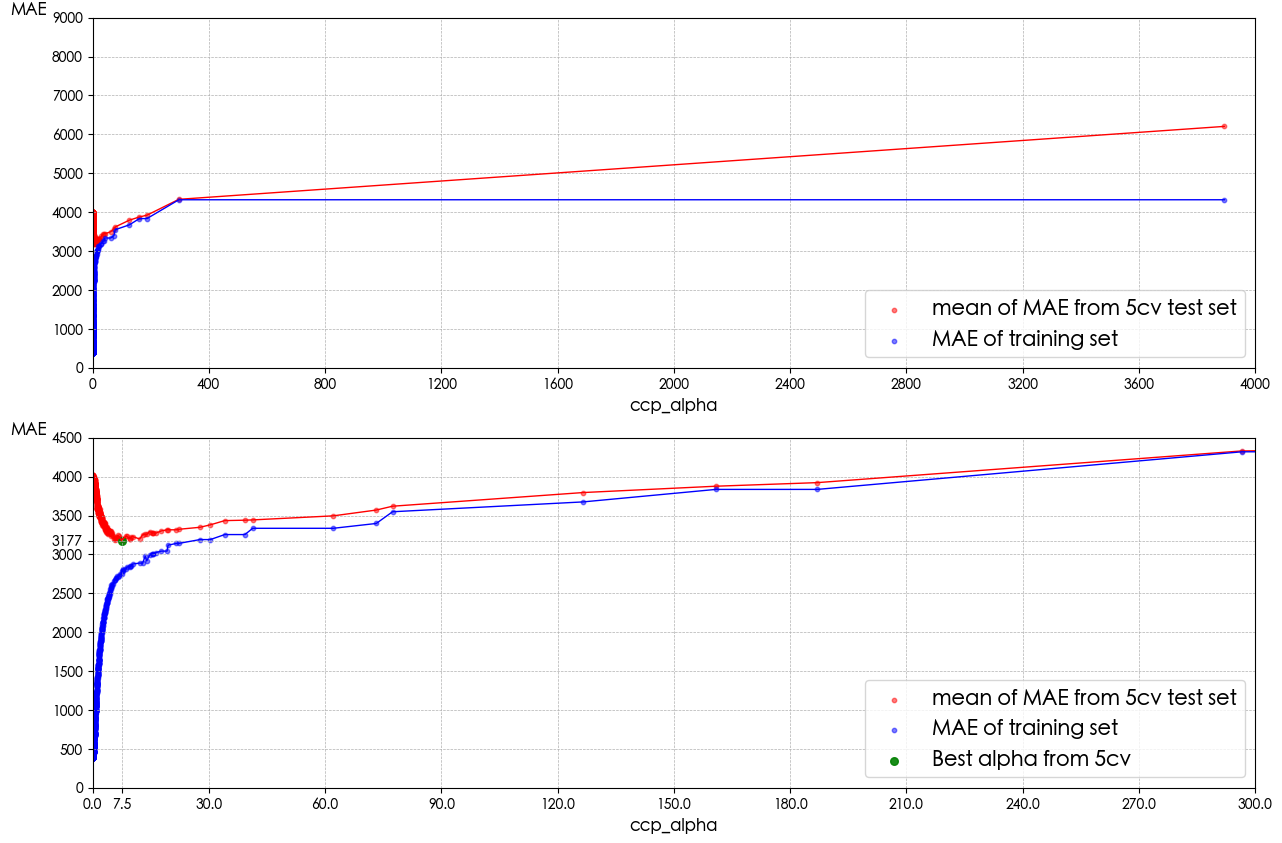

In [52]:
fig = plt.figure(figsize=(15,10))

sub1 = fig.add_subplot(211)
sub1.scatter(ccp_alphas, ccp_test_maes, color = 'red', s = 10, alpha = 0.5)  
sub1.scatter(ccp_alphas, ccp_train_maes, color = 'blue', s = 10, alpha = 0.5)  
sub1.plot(ccp_alphas, ccp_test_maes, color='red', linewidth=1)
sub1.plot(ccp_alphas, ccp_train_maes, color='blue', linewidth=1)
sub1.grid(linestyle='--', linewidth=0.5)
sub1.set_xlabel("ccp_alpha",fontsize=12,rotation=0)
sub1.set_ylabel("MAE",fontsize=12, rotation=0, loc = 'top')
sub1.set_ylim([0,9000])
sub1.set_xlim([0, 4000])
sub1.set_xticks(np.linspace(0,4000,11))
sub1.set_yticks(np.linspace(0,9000,10))
sub1.legend(['mean of MAE from 5cv test set', 'MAE of training set'], fontsize = 15, loc = "lower right")


sub2 = fig.add_subplot(212)
sub2.scatter(ccp_alphas, ccp_test_maes, color = 'red', s = 10, alpha = 0.5)  
sub2.scatter(ccp_alphas, ccp_train_maes, color = 'blue', s = 10, alpha = 0.5)  

sub2.scatter(top_3_maes[0][0], top_3_maes[0][1], color = 'green', s = 30, alpha = 0.9) 
sub2.plot(ccp_alphas, ccp_test_maes, color='red', linewidth=1)
sub2.plot(ccp_alphas, ccp_train_maes, color='blue', linewidth=1)
sub2.grid(linestyle='--', linewidth=0.5)
sub2.set_xlabel("ccp_alpha",fontsize=12,rotation=0)
sub2.set_ylabel("MAE",fontsize=12, rotation=0, loc = 'top')
sub2.set_ylim([0,4500])
sub2.set_xlim([0,300])
sub2.set_xticks(np.append(np.linspace(0,300,11),top_3_maes[0][0]))
sub2.set_yticks(np.append(np.linspace(0,4500,10),top_3_maes[0][1]))
sub2.legend(['mean of MAE from 5cv test set', 'MAE of training set', 'Best alpha from 5cv'], fontsize = 15
            ,loc = "lower right")
plt.show()

### Visualize pruned tree from CCP

In [53]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'absolute_error'
                            , min_samples_leaf = 5
                            , ccp_alpha = top_3_maes[0][0]).fit(X_train, y_train)

pred_y_train = dtr.predict(X_train)
pred_y_test = dtr.predict(X_test)

print('training R squared :', dtr.score(X_train, y_train))
print('training MAE :', mean_absolute_error(y_train, pred_y_train))
print('test R squared :', dtr.score(X_test, y_test))
print('test MAE :', mean_absolute_error(y_test, pred_y_test))



training R squared : 0.7488970895300917
training MAE : 2909.9845041322315
test R squared : 0.7322191700969253
test MAE : 3388.8261093911246


In [54]:
np.unique(pred_y_train)

array([  5500. ,   6500. ,   7500. ,   8300. ,   9500. ,  11500. ,
        12999.5,  14399. ,  15250. ,  16249.5,  17999. ,  20000. ,
        21999. ,  22500. ,  23000. ,  24000. ,  25000. ,  25999.5,
        27000. ,  27999. ,  31249.5,  35500. ,  44999. ,  65000. ,
        71500. ,  98000. , 120000. , 137000. ])

In [55]:
np.unique(pred_y_test)

array([  5500. ,   6500. ,   7500. ,   8300. ,   9500. ,  11500. ,
        12999.5,  14399. ,  15250. ,  16249.5,  17999. ,  20000. ,
        21999. ,  22500. ,  23000. ,  24000. ,  25000. ,  25999.5,
        27000. ,  27999. ,  31249.5,  35500. ,  44999. ,  65000. ,
        71500. ,  98000. , 120000. , 137000. ])

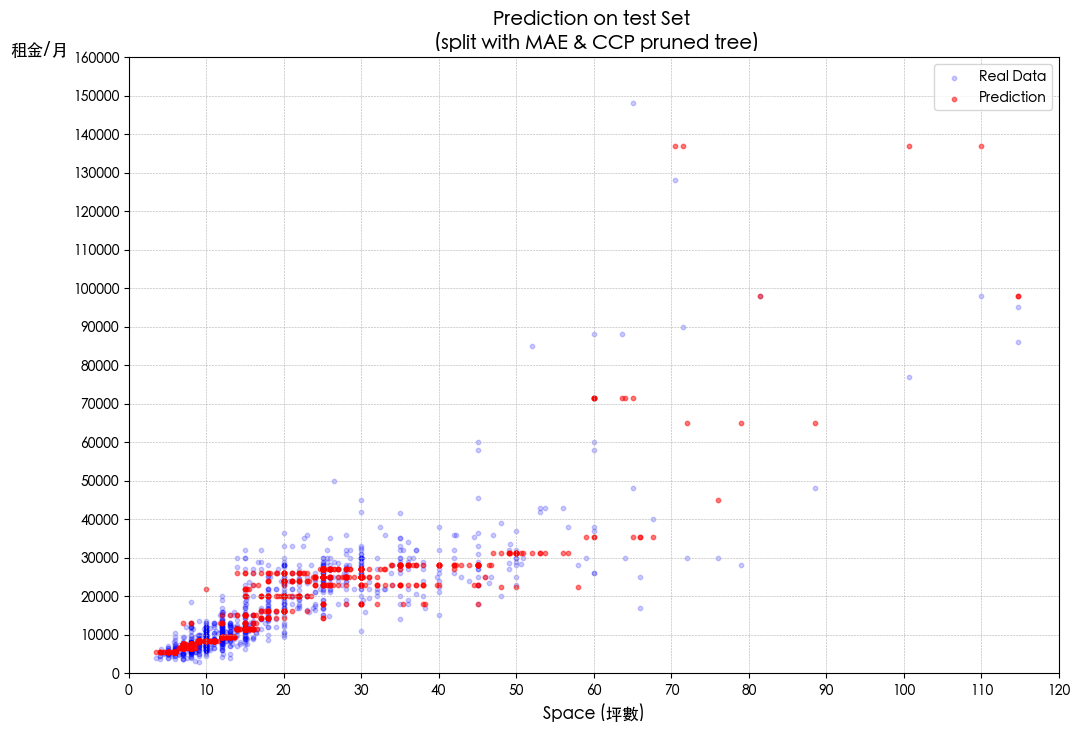

In [56]:
# test set (space and price)

plt.rcParams['font.family'] = ['Heiti TC']

fig2 = plt.figure(figsize=(12,8))

ax = fig2.add_subplot(111)
ax.scatter(X_test['space'], y_test, color = 'blue', s = 10, alpha = 0.2)  
ax.scatter(X_test['space'], pred_y_test, color = 'red', s = 10, alpha = 0.5)  

ax.set_ylim([0,160000])
ax.set_xlim([0, 120])
ax.set_yticks(np.linspace(0,160000,17))
ax.set_xticks(np.linspace(0,120,13))
ax.grid(linestyle='--', linewidth=0.4)

ax.set_xlabel("Space (坪數)",fontsize=12,rotation=0)
ax.set_ylabel("租金/月",fontsize=12, rotation=0, loc = 'top')
ax.set_title('Prediction on test Set \n (split with MAE & CCP pruned tree)', fontsize=14)
ax.legend(['Real Data', 'Prediction'], fontsize = 10)

plt.show()



In [57]:
import graphviz
from sklearn import tree

In [58]:
dot_data = tree.export_graphviz(dtr
                                ,feature_names= X_train.columns
                                ,filled=True
                                ,rounded=True
                                ,rotate = True
                                # , leaves_parallel = True
                                )


graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('tree_mae_ccp',view=True)

'tree_mae_ccp.png'

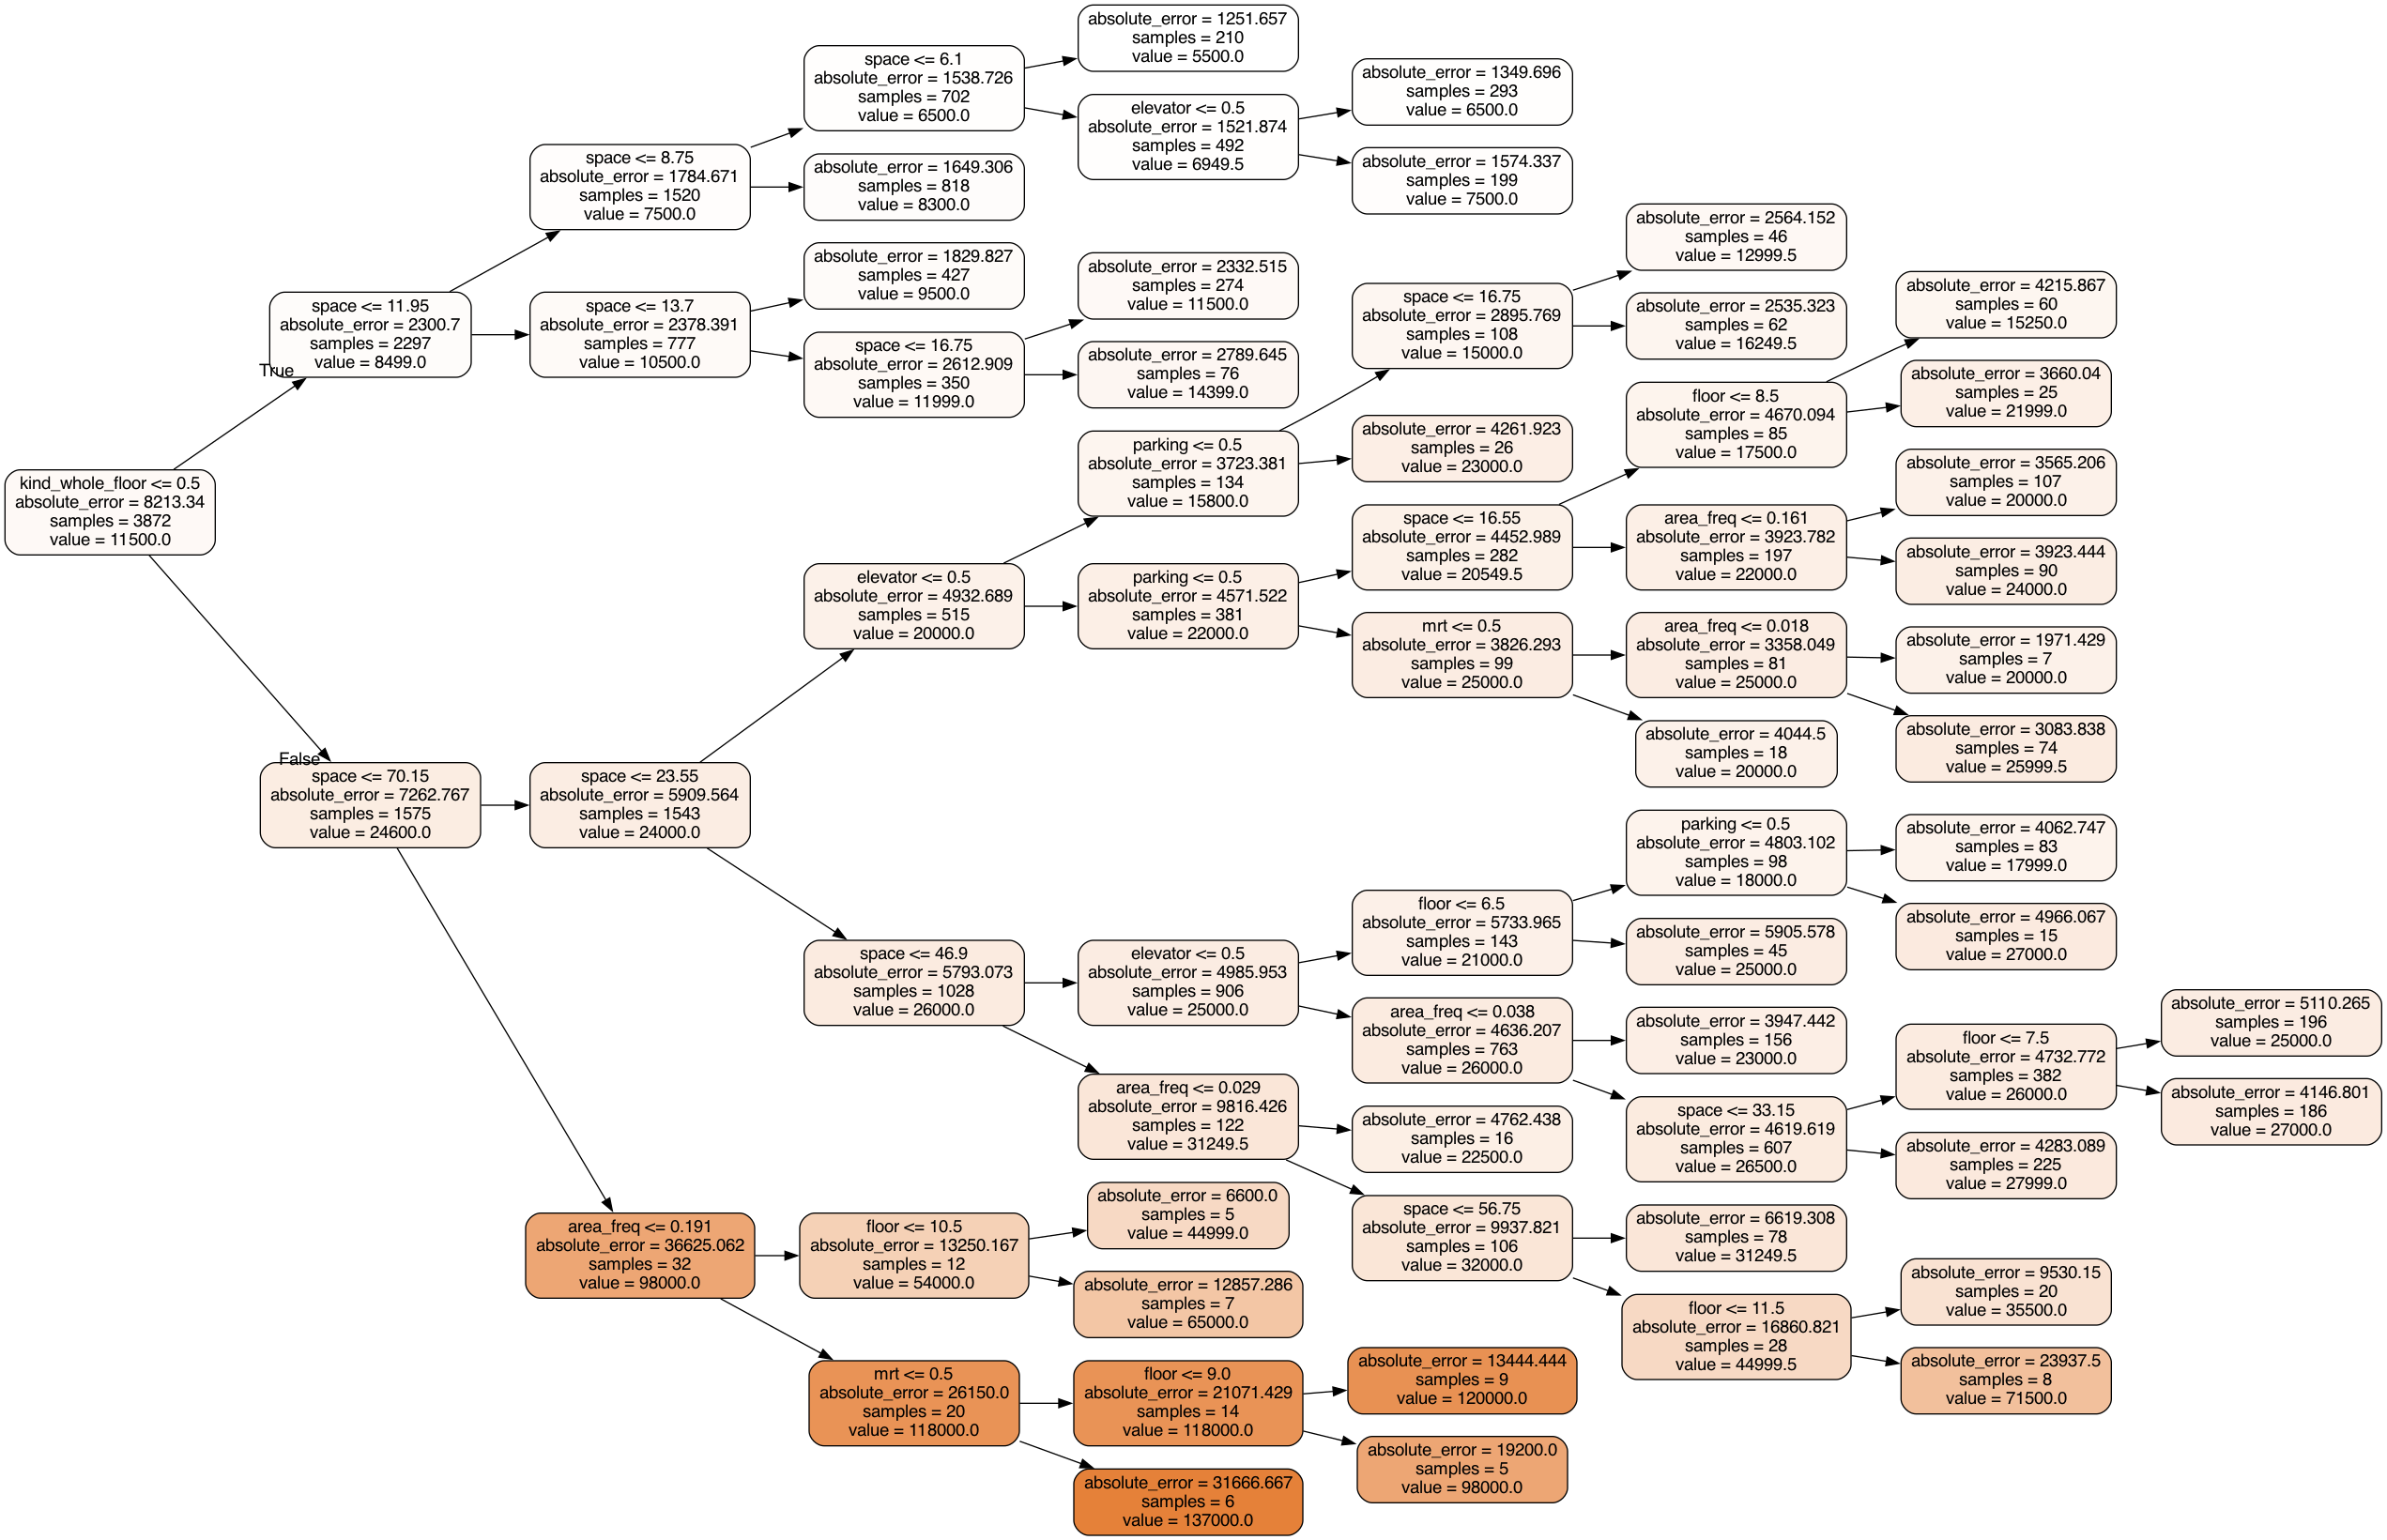

In [59]:
from IPython.display import Image
Image(filename=('./tree_mae_ccp.png'),width=1500)

# Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

In [61]:
rfr = RandomForestRegressor(random_state = 100
                            , criterion = 'absolute_error'
                            , bootstrap = True
                            , oob_score = True
                            , n_estimators = 150)

para = {"max_depth":[*range(3,16)]
        , 'min_samples_leaf':[*range(5,55,10)]
        }

GS = GridSearchCV(rfr, para, cv=5, scoring = 'r2', n_jobs = 4)
start = time.time()
GS.fit(X,y)
end = time.time()
print('The calculation cost: ',end - start, 'sec')

The calculation cost:  1876.5925669670105 sec


In [62]:
GS.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=13,
                      min_samples_leaf=5, n_estimators=150, oob_score=True,
                      random_state=100)

In [63]:
rfr = GS.best_estimator_.fit(X_train,y_train)

In [64]:
pred_y_train = rfr.predict(X_train)
pred_y_test = rfr.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error
print('training set MAE :',mean_absolute_error(y_true = y_train, y_pred = pred_y_train))
print('test set MAE :', mean_absolute_error(y_true = y_test, y_pred = pred_y_test))

print('training R squared :', rfr.score(X_train, y_train))
print('test R squared :', rfr.score(X_test, y_test))

training set MAE : 2444.346703684573
test set MAE : 3216.17077743378
training R squared : 0.7658624327366677
test R squared : 0.7622963582003512


In [66]:
rfr.oob_score_

0.7181644781477141

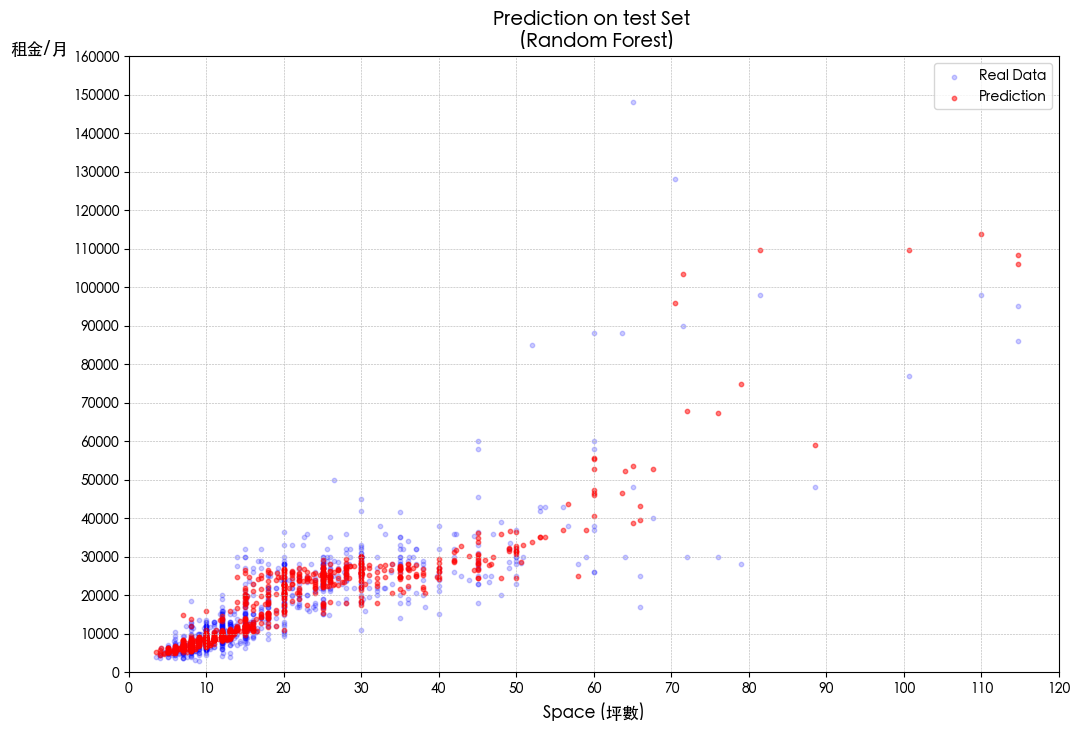

In [67]:
plt.rcParams['font.family'] = ['Heiti TC']

fig2 = plt.figure(figsize=(12,8))

ax = fig2.add_subplot(111)
ax.scatter(X_test['space'], y_test, color = 'blue', s = 10, alpha = 0.2)  
ax.scatter(X_test['space'], pred_y_test, color = 'red', s = 10, alpha = 0.5)  

ax.set_ylim([0,160000])
ax.set_xlim([0, 120])
ax.set_yticks(np.linspace(0,160000,17))
ax.set_xticks(np.linspace(0,120,13))
ax.grid(linestyle='--', linewidth=0.4)

ax.set_xlabel("Space (坪數)",fontsize=12,rotation=0)
ax.set_ylabel("租金/月",fontsize=12, rotation=0, loc = 'top')
ax.set_title('Prediction on test Set \n (Random Forest)', fontsize=14)
ax.legend(['Real Data', 'Prediction'], fontsize = 10)

plt.show()


# Conclusion

<!-- 
training set MAE : 3541.1085988204945<p>
test set MAE : 3904.503231491259<p>
training R squared : 0.7092267108225283<p>
test R squared : 0.7184548477363382<p>
<p>
<p>
<p>
training set MAE : 2584.8535640495866<p>
test set MAE : 3438.018575851393<p>
training R squared : 0.7577799465767896<p>
test R squared : 0.7375236486004655<p>
<p>
<p>
<p>    
training R squared : 0.7488970895300917<p>
training MAE : 2909.9845041322315<p>
test R squared : 0.7322191700969253<p>
test MAE : 3388.8261093911246<p>
<p>
<p>
<p>
training set MAE : 2444.346703684573<p>
test set MAE : 3216.17077743378<p>
training R squared : 0.7658624327366677<p>
test R squared : 0.7622963582003512<p> -->

In [118]:
x = np.arange(1,5)
info = {'training set MAE':[3541.1085988204945, 2584.8535640495866, 2909.9845041322315, 2444.346703684573],
        'test set MAE':[3904.503231491259, 3438.018575851393, 3388.8261093911246, 3216.17077743378],
        'training set R squared':[0.7092267108225283, 0.7577799465767896, 0.7488970895300917, 0.7658624327366677],
        'test set R squared':[0.7184548477363382, 0.7375236486004655, 0.7322191700969253, 0.7622963582003512]
       }
             
info['training set MAE']

[3541.1085988204945, 2584.8535640495866, 2909.9845041322315, 2444.346703684573]

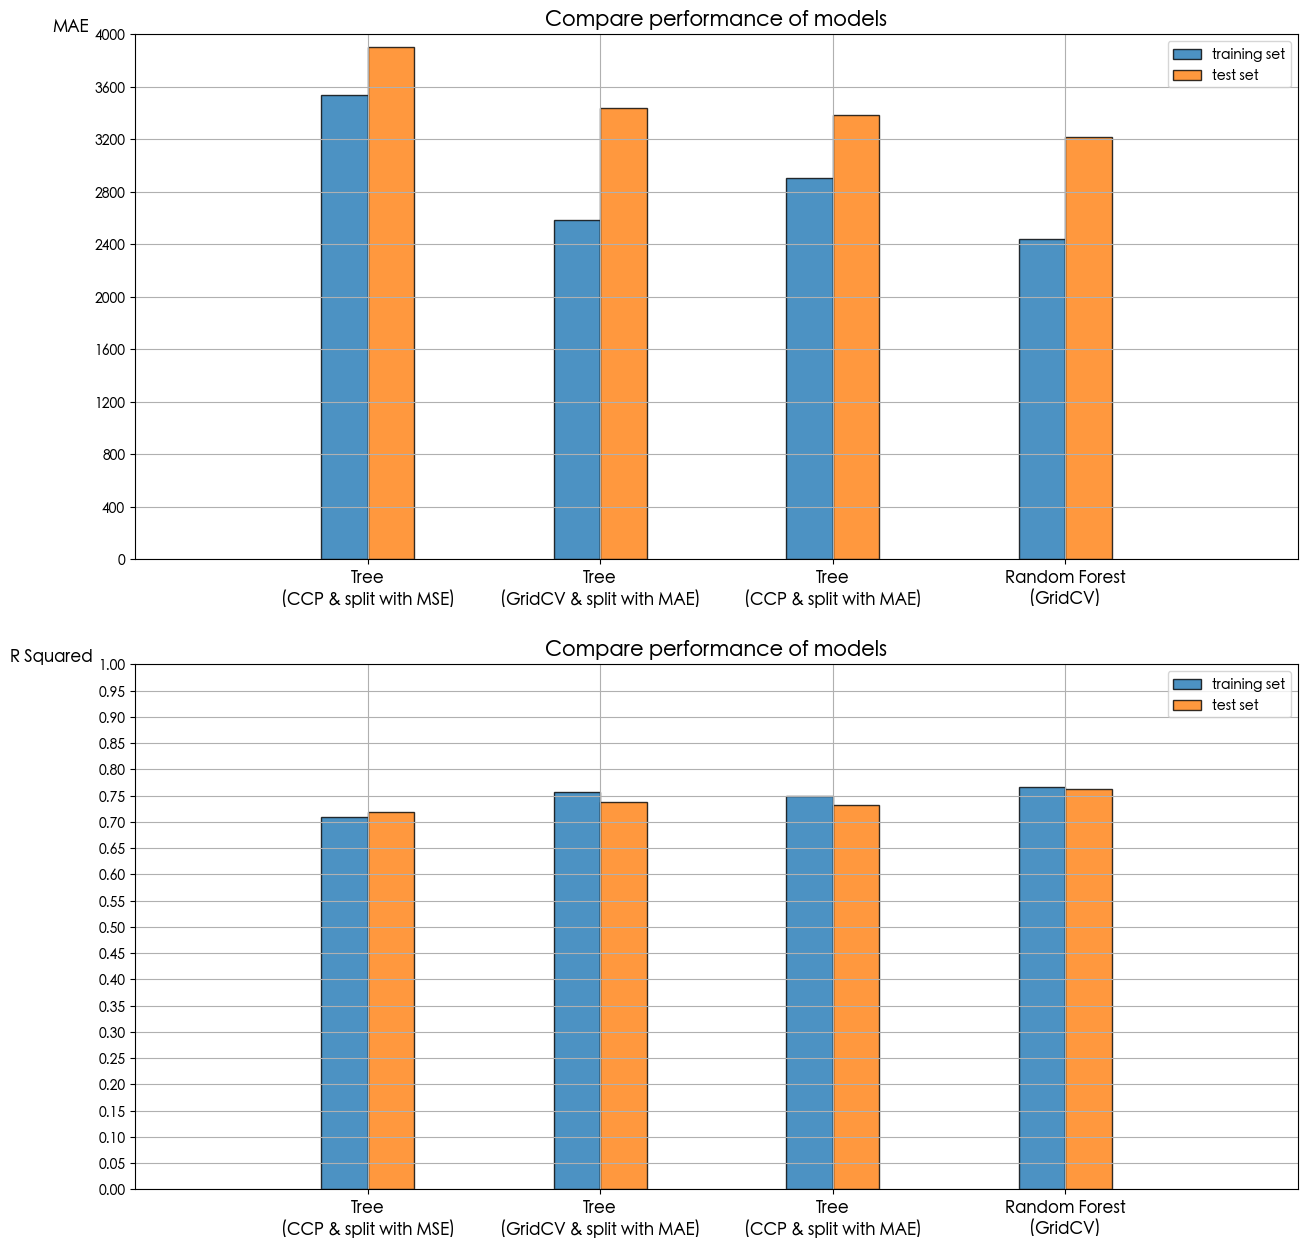

In [119]:
fig = plt.figure(figsize=(15,15))
xlabels = ['Tree\n(CCP & split with MSE)',
           'Tree\n(GridCV & split with MAE)',
           'Tree\n(CCP & split with MAE)',
           'Random Forest\n(GridCV)']

sub1 = fig.add_subplot(211)
sub1.bar(x = x-0.1, height = info['training set MAE'], width = 0.2, alpha = 0.8, edgecolor = 'k')
sub1.bar(x = x+0.1, height = info['test set MAE'], width = 0.2, alpha = 0.8, edgecolor = 'k')  
sub1.grid()
sub1.set_xlim([0,5])
sub1.set_ylim([0, 4000])
sub1.set_xticks(np.linspace(1,4,4))
sub1.set_yticks(np.linspace(0,4000,11))
sub1.set_xticklabels(xlabels ,fontsize=12,rotation=0)
sub1.set_ylabel("MAE",fontsize=12,rotation=0, loc = 'top')
sub1.legend(['training set','test set'])
sub1.set_title('Compare performance of models', fontsize = 15)

sub2 = fig.add_subplot(212)
sub2.bar(x = x-0.1, height = info['training set R squared'], width = 0.2, alpha = 0.8, edgecolor = 'k')
sub2.bar(x = x+0.1, height = info['test set R squared'], width = 0.2, alpha = 0.8, edgecolor = 'k')  
sub2.grid()
sub2.set_xlim([0,5])
sub2.set_ylim([0, 1])
sub2.set_xticks(np.linspace(1,4,4))
sub2.set_yticks(np.linspace(0,1,21))
sub2.set_xticklabels(xlabels ,fontsize=12,rotation=0)
sub2.set_ylabel("R Squared",fontsize=12,rotation=0, loc = 'top')
sub2.legend(['training set','test set'])
sub2.set_title('Compare performance of models', fontsize = 15)


plt.show()